In [1]:
import numpy as np
from pymanopt.manifolds import Sphere
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

import mala.potentials
import mala.utils as my
import mala.metropolis_hastings as vanilla_mh
import mala.MA_metropolis_hastings as mamh

%load_ext autoreload
%autoreload 2

/Users/adeladepavia/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/adeladepavia/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


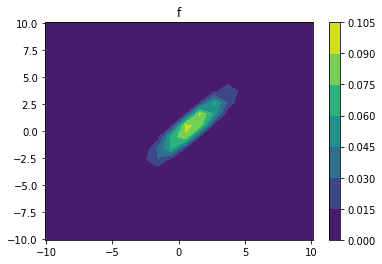

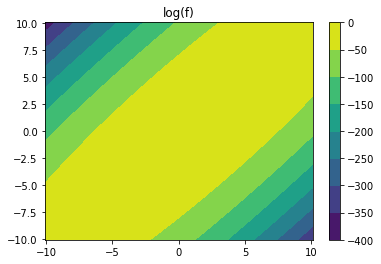

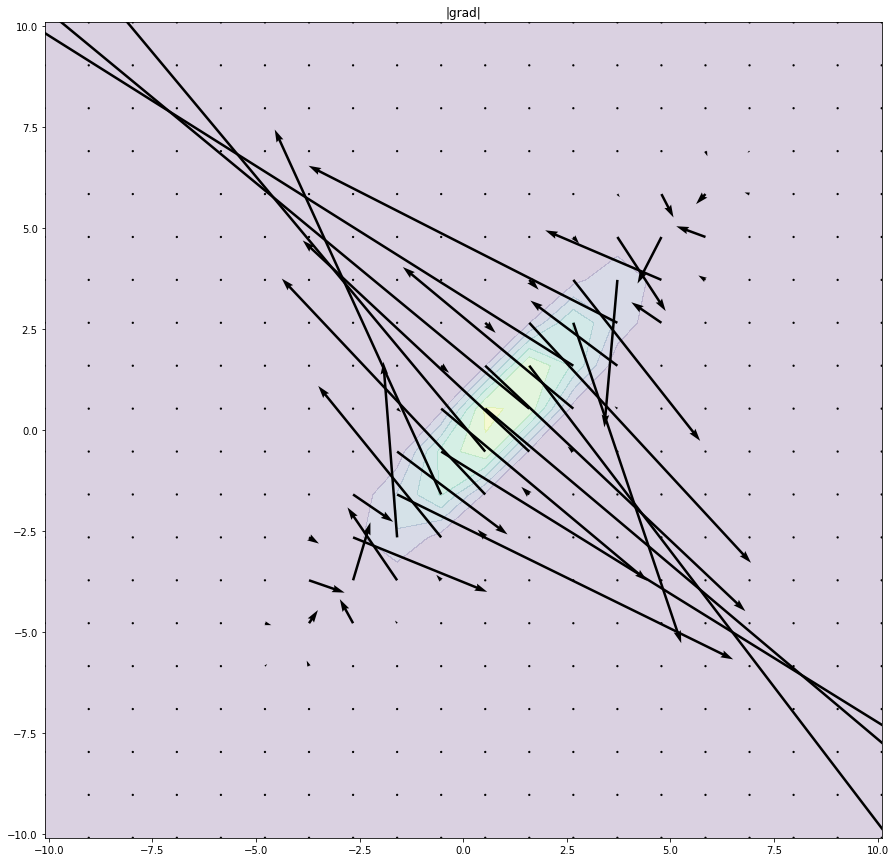

In [2]:
Sigma = 3*np.array([[ 1. , 1.0], [1.0,  1.2]])
Mu = np.array([1,0.5])

H = mala.potentials.Gaussian(ambient_dim=2,
                                   proper_dim = 2,mu = Mu,cov=Sigma)
my.plot_potential(H,[-10,10])

# Compare how quickly manifold langevin converges vs vanilla langevin

Compare multiple methods of calculating Fisher information matrix

Manifold-Adjusted MALA


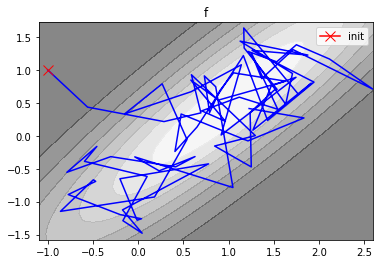

Last  100  samples: estimated covariance
[[1.24504562e-30 4.98018248e-31]
 [4.98018248e-31 1.99207299e-31]]


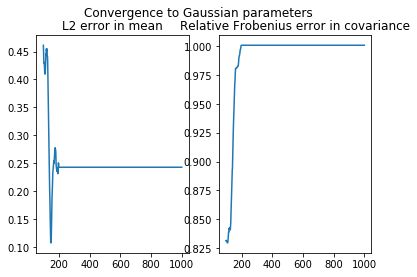

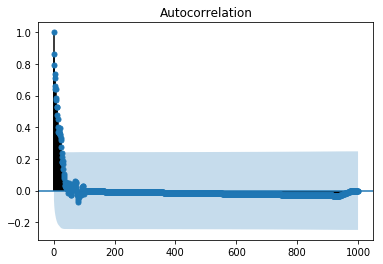

MALA


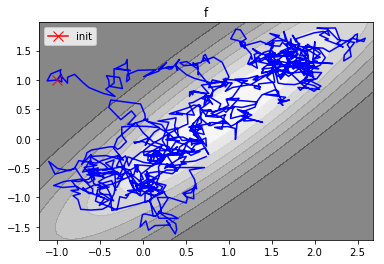

Last  100  samples: estimated covariance
[[0.18066332 0.00394041]
 [0.00394041 0.08265884]]


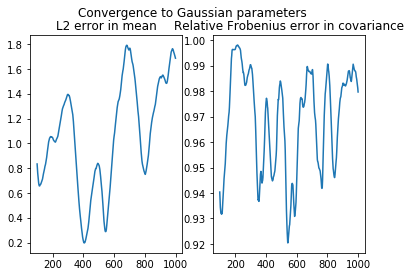

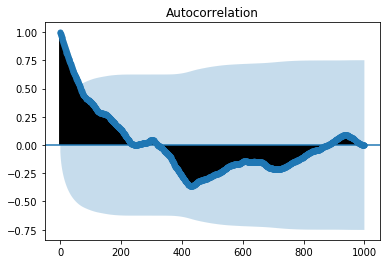

Gaussian


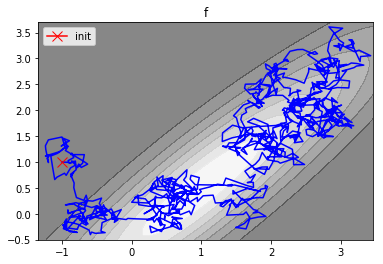

Last  100  samples: estimated covariance
[[0.3066949  0.1893946 ]
 [0.1893946  0.16119608]]


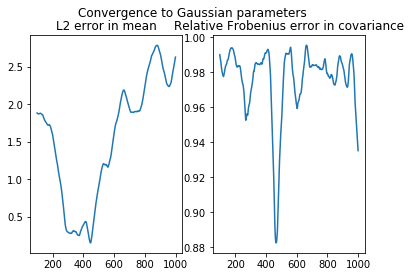

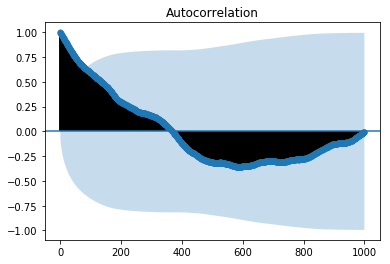

In [23]:
x_0 = 1*np.array([-1,1])
T = 1000

# Use the observed Fisher information matrix as an approximation of the 
# Fisher-Rao metric
step_size=0.5
burnin = np.int(0.1*T)
print('Manifold-Adjusted MALA')
info_matrix = (lambda x,traj : mamh.empirical_Fisher_metric(H,x,traj,burnin))
evolution = mamh.MAMH(_,H,
                 update_rule=(lambda x,traj: mamh.const_K_langevin(x,traj,info_matrix,H,step_size)),
                     initial_point=x_0,max_steps=T)
my.plot_2D_evolution(H,evolution,gradient=False)
my.Gaussian_convergence(H,evolution,print_cov=True)

plot_acf([v.pos[0] for v in evolution])
plt.show()

step_size=0.1

# Vanilla
print('MALA')
identity_matrix = (lambda x,_ : np.identity(x.size))
evolution = mamh.MAMH(_,H,
                 update_rule=(lambda x,traj: mamh.const_K_langevin(x,traj,identity_matrix,H,step_size)),
                     initial_point=x_0,max_steps=T)
my.plot_2D_evolution(H,evolution,gradient=False)
my.Gaussian_convergence(H,evolution,print_cov=True)

plot_acf([v.pos[0] for v in evolution])
plt.show()

# Gaussian update
print('Gaussian')
evolution = mamh.MAMH(_,H,
                 update_rule=(lambda x,_: vanilla_mh.gaussian(_,x,radius=step_size)),
                     initial_point=x_0,max_steps=T)
my.plot_2D_evolution(H,evolution,gradient=False)
my.Gaussian_convergence(H,evolution,print_cov=True)

plot_acf([v.pos[0] for v in evolution])
plt.show()

